#### LOADING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings 

#### LOADING TRAINING DATA

In [2]:
cs1 = pd.read_csv("Data/train.csv")
cs1

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#### THE FOLLOWING IS OUR PLAN :

#### 1. EXPLANATORY ANALYSIS
* ##### Insights into the data types & checking for null values.
* ##### Taking care of null values & coverting data type.
* ##### Checking for anamolies.

#### 2. VISUALIZATION & MODELING
* ##### Initial Data visualization & coorlation matrix.
* ##### Feature selection & prepration for modeling.
* ##### Model choise & justification.
* ##### Mesuring model performance.

#### 3. VISUALIZATION & MODELING
* ##### Testing the model.
* ##### Hyper parameter tuning.



### Insights into the data types & checking for null values.

In [3]:
cs1.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
cs1.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
cs1['Arrival Delay in Minutes']

0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [6]:
for col in cs1.columns:
    if cs1[col].dtypes == 'float64':
        cs1[col].fillna(-1,inplace=True)

In [7]:
cs1.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
cs1['Arrival Delay in Minutes']= cs1['Arrival Delay in Minutes'].astype(np.int64)


In [9]:
cs1.dtypes

Unnamed: 0                            int64
id                                    int64
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes      

In [10]:
for colum in cs1:
    unique_values = np.unique(cs1[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features Unnamed: 0 : 103904
The number of unique values for features id : 103904
The number of unique values for features Gender : 2 --- ['Female' 'Male']
The number of unique values for features Customer Type : 2 --- ['Loyal Customer' 'disloyal Customer']
The number of unique values for features Age : 75
The number of unique values for features Type of Travel : 2 --- ['Business travel' 'Personal Travel']
The number of unique values for features Class : 3 --- ['Business' 'Eco' 'Eco Plus']
The number of unique values for features Flight Distance : 3802
The number of unique values for features Inflight wifi service : 6 --- [0 1 2 3 4 5]
The number of unique values for features Departure/Arrival time convenient : 6 --- [0 1 2 3 4 5]
The number of unique values for features Ease of Online booking : 6 --- [0 1 2 3 4 5]
The number of unique values for features Gate location : 6 --- [0 1 2 3 4 5]
The number of unique values for features Food and drink : 6 --- 

<AxesSubplot:xlabel='Gender', ylabel='Online boarding'>

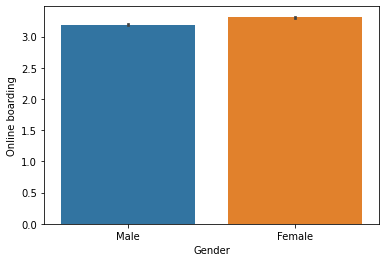

In [11]:
sns.barplot(x=cs1['Gender'],y=cs1['Online boarding'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

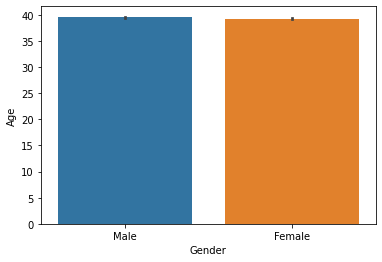

In [12]:
sns.barplot(y=cs1['Age'],x=cs1['Gender'])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Class'>

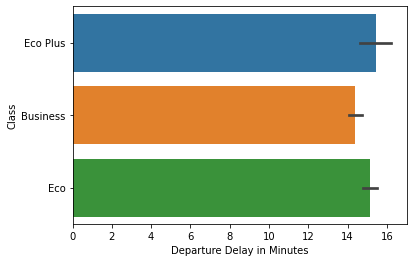

In [16]:
sns.barplot(y=cs1['Class'],x=cs1['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Class'>

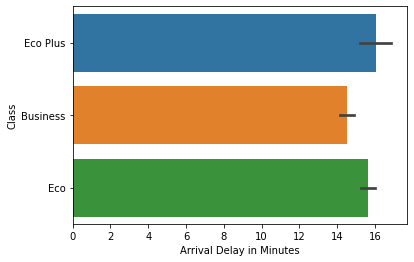

In [17]:
sns.barplot(y=cs1['Class'],x=cs1['Arrival Delay in Minutes'])